<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Notebook Content</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#section-one" role="tab" aria-controls="profile">Introduction<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#section-two" role="tab" aria-controls="messages">About Data & Variables<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#section-three" role="tab" aria-controls="settings">Importing Libraries & Data<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#section-four" role="tab" aria-controls="settings">Data Cleaning<span class="badge badge-primary badge-pill">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#section-five" role="tab" aria-controls="settings">Exploratory Data Analysis<span class="badge badge-primary badge-pill">5</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#section-six" role="tab" aria-controls="settings">Statistical Testing<span class="badge badge-primary badge-pill">6</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#section-seven" role="tab" aria-controls="settings">Insights<span class="badge badge-primary badge-pill">7</span></a>

<p style="background-color:black;color:white;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;">Introduction </p>
<a class="anchor"  id="section-one"></a>

Customer behavior Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Here we have a data of 2240 customers about their educational level, marital status, year of birth, amount spend on our products, purchase modes in last 2 years. Here, we will be discovering about the factors that affects amount spend by customers. We will be answering questions such as the most preferred mode by customers,how educational level, age range, marital status affect the expense and also about the products customers most likely to buy

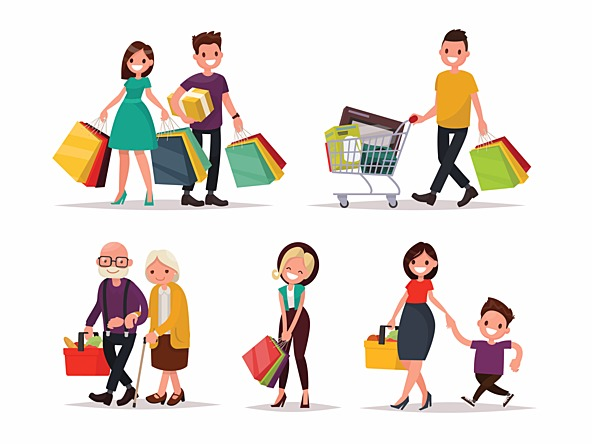



<p style="background-color:black;color:white;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;">About Data & Variables</p>
<a class="anchor"  id="section-two"></a>

### People

Variable | Description
---- | ----
ID | Customer's unique identifier
Year_Birth | Customer's birth year
Education | Customer's education level
Marital_Status | Customer's marital status
Income | Customer's yearly household income
Kidhome | Number of children in customer's household
Teenhome | Number of teenagers in customer's household
Dt_Customer | Date of customer's enrollment with the company
Recency | Number of days since customer's last purchase
Complain | 1 if customer complained in the last 2 years, 0 otherwise

### Products

Variable | Description
---- | ----
MntWines | Amount spent on wine in last 2 years
MntFruits | Amount spent on fruits in last 2 years
MntMeatProducts | Amount spent on meat in last 2 years
MntFishProducts | Amount spent on fish in last 2 years
MntSweetProducts | Amount spent on sweets in last 2 years
MntGoldProds | Amount spent on gold in last 2 years

### Promotions

Variable | Description
---- | ----
AcceptedCmp1 | 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2 | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3 | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4 | 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5 | 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response | 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

Variable | Description
---- | ----
NumDealsPurchases | Number of purchases made with a discount
NumWebPurchases | Number of purchases made through the company’s web site
NumCatalogPurchases | Number of purchases made using a catalogue
NumStorePurchases | Number of purchases made directly in stores
NumWebVisitsMonth | Number of visits to company’s web site in the last month



<p style="background-color:black;color:white;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;">Importing libraries and Data</p>

<a class="anchor"  id="section-three"></a>

In [ ]:
library(skimr)
library(DataExplorer)
library(dplyr)
library(ggplot2)
library(scales)
library(car)
library(rstatix)
library(tidyr) 
main_df = read.table("../input/customer-personality-analysis/marketing_campaign.csv", sep = "\t", header = T)
main_df=data.frame(main_df)

<p style="background-color:black;color:white;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;">Data Cleaning</p>

<a class="anchor"  id="section-four"></a>

In [ ]:
#Plot the introduction to the dataset
plot_intro(main_df,title='main_df dataset')

In [ ]:
skim(main_df)

In [ ]:
head(main_df,4)

In [ ]:
plot_bar(main_df,ncol=2)

In [ ]:
# As we can see, columns z_costcontact and z_revenue have single vaue throughout the data
# Thus we will remove those columns

main_df = main_df %>% select(-c(Z_CostContact,Z_Revenue))

In [ ]:
# Distribution of Income Variable

ggplot(main_df, aes(x=Income)) +
  geom_density(color="darkblue", fill="lightblue") + 
  theme_bw()

In [ ]:
# Filling the missing value with median value

main_df$Income[is.na(main_df$Income)]=median(main_df$Income,na.rm=T)

# As we can see that the distribution of the income variable is rightly skewed
# Thus, we can use median to fill the missing values

In [ ]:
# 2nd cycle represents the master's degree 
# Replacing 2nd cycle with master's degree

main_df = main_df %>% 
mutate(Education = replace(Education, Education == '2n Cycle','Master'))

In [ ]:
# Grouping the categories in marital status into 2 categories such as 'single' and 'in relationship'

main_df = main_df %>%
mutate(Marital_Status=replace(Marital_Status, Marital_Status == 'Alone' | 
                              Marital_Status == 'Absurd' | Marital_Status == 'YOLO' | 
                              Marital_Status == 'Widow' | 
                              Marital_Status == 'Divorced','Single')) %>%
mutate(Marital_Status=replace(Marital_Status, Marital_Status == 'Married' | 
                              Marital_Status == 'Together','In Relationship'))

In [ ]:
#Calculating the current year

current_date= Sys.Date()
current_year = format(current_date,format="%Y")
current_year = as.integer(current_year)

# Adding the Age Column in main_df and removing the Year_Birth column 

main_df = main_df %>% mutate(Age = 2022- Year_Birth) %>% select(- Year_Birth)

In [ ]:
# Adding the Age_Range column

main_df = main_df %>% mutate(Age_Range = if_else(Age <= 16,"Children",
if_else(17 <= Age & Age <= 30,"Youth",
if_else(30 < Age & Age <= 45,"Middle Aged","Old"))))


In [ ]:
# Calculating total Spent for each customer

main_df = main_df %>%
mutate(Total_Spent = MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + 
       MntGoldProds)

In [ ]:
# Calculating the total no of purchases made by customers

main_df = main_df %>%
mutate(Total_Purchases = NumWebPurchases + NumCatalogPurchases + NumStorePurchases + 
       NumDealsPurchases)

In [ ]:
# Calculating the Enrollment Year of Customers 

main_df = main_df %>% separate(Dt_Customer,c('Date','Month','Year'),sep="-") %>% 
select(- c('Month','Date')) %>%
rename(Enrollment_Year = Year)

main_df['Enrollment_Year'] = as.integer(main_df$Enrollment_Year)

main_df = main_df %>%
mutate(Seniority = 2022 - Enrollment_Year)


In [ ]:
# Calculating total no of accepted offers for each customer

main_df = main_df %>%
mutate(Total_Offers = AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 )

**To sum up, we have made the following changes to our data frame:**

- In columns 'z_costcontact','z_revenue' all values are equal, so we dropped this columns from the df.
- No duplicated values and errors. Only 'Income' column has 24 missing values. Since income variable is skewed, we replaced null values with median value of income variable.
- Education variable has 5 categories in which 2nd cycle shows the Masters degree qualification. So, we converted the '2n cycle' as 'Master'
- We segregated the categories in Marital Status column into 2 categories: 'Single' & 'In Relationship'
- We calculated the Age column and categorized customers according to their age group.
- We calculated the total amount spend by customers on all products as 'Total_Spent' Variable.
- We calculated the total no of puchases made by each customer in last 2 years
- We calculated the Enrollment year of customers with the company from Dt_Customer variable
- We calculated the total no of accepted offers for each customer


In [ ]:
head(main_df,2)


<p style="background-color:black;color:white;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Exploratory Data Analysis</p>



<a class="anchor"  id="section-five"></a>

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Age Range of Customers</p>



<a class="anchor"  id="age"></a>

In [ ]:
# Percentages of Age Group

age_range = main_df %>% 
select(Age_Range) %>%
group_by(Age_Range) %>% 
summarize(num=n()) %>% 
mutate(percentage=round(num*100/sum(num),2))


In [ ]:
ggplot(age_range, aes(x=factor(Age_Range,levels=c('Youth','Middle Aged','Old')),y=num,fill=Age_Range))+ 
geom_bar(stat='identity') + 
labs(x='Age Group',y='Count')+
geom_text(aes(label=paste0(num ,' (',percentage,'%',')')),vjust=-.5)+
scale_fill_manual(values = c("#41B7C4", "#CCEDB1","#F5CA63" )) +
theme_bw()

### Observations!

- 72% of customers are aged above 45
- Only 25% of customers are middle aged (between 30 and 45)
- There is no significant amount of children and young customers

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> PDF & CDF of Total Spent Variable</p>



<a class="anchor"  id="age"></a>

In [ ]:
ggplot(data = main_df, aes(x=Total_Spent)) + 
geom_histogram(bins = 6,aes(y = stat(width*density)),color = "darkblue", fill = "lightblue", 
alpha = 0.5) + 
scale_x_continuous(breaks=seq(0,2500,by=500)) +
labs(x='Total Spent',y='Probability') +
scale_y_continuous(labels = scales::percent_format(accuracy=1)) + #from scales
theme_bw()


**Observations!**

The Probability Density Function plot above shows that 
- 40% of customers have spending - below 250 dollar
- 21% of customers have spending between 250 and 750 dollars
- 19% of customers have spending between 750 and 1250 dollars
- Clearly, chances of spending more than 2000 dollars seems to be rare


In [ ]:
ggplot(main_df,aes(x=Total_Spent))+ 
stat_ecdf(geom='step',size=1,color="#00AFBB",linetype='dashed') +
scale_y_continuous(breaks=seq(0,1.0,by=0.1))+
theme_bw()

**Observations!**

The above cumulative ditribution plot shows that

- To support our previous result, more than 95% of the customers spend less than 2000 dollar
- Furthermore, 55% of customers spend less than 500$

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> PDF & CDF of Income Variable</p>



<a class="anchor"  id="age"></a>

In [ ]:
ggplot(data = main_df, aes(x= Income)) + 
geom_histogram(bins = 6,aes(y = stat(width*density)),color = "darkblue", fill = "lightblue", alpha = 0.5) + 
labs(x='Income',y='Probability') +
scale_x_continuous(limits=c(0,200000),breaks=seq(0,200000,by=20000)) + # Ignoring Outlier
scale_y_continuous(labels = scales::percent_format(accuracy=1)) + #from scales
theme_bw()


**Observations!**

The above density plot of income variable shows that

* 60% of customers earn between 20k and 60k dollars yearly
* 38% of customers earn between 60k and 100k dollars yearly
* The chances of earning more than 100k seem to be rare

In [ ]:
ggplot(main_df,aes(x=Income))+ 
stat_ecdf(geom='step',size=1,color="#00AFBB",linetype='dashed') +
scale_x_continuous(limits=c(0,200000),breaks=seq(0,200000,by=20000)) + # Ignoring Outliers
scale_y_continuous(breaks=seq(0,1.0,by=0.1))+
theme_bw()

**Observations!**

The above cumulative distribution plot of income variable shows that

* To support our previous result, more than 95% of customers earn less than 100k

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Correlation between Income and Expense Variable</p>



<a class="anchor"  id="age"></a>

In [ ]:
# Correlation Test between Inocme and Total Spent Variable

cor.test(main_df$Income, main_df$Total_Spent) 

> Since p value is less than .05, we have sufficient evidence to say that the correlation between the two variables is statistically significant.



In [ ]:
ggplot(main_df,aes(x=Income,y=Total_Spent))+
geom_point(shape=21, color="black", fill="#69b3a2", size=2)+
scale_x_continuous(limits=c(0,200000),breaks=seq(0,200000,by=20000)) + # Ignoring Outliers
geom_smooth(method=lm, se=FALSE, color='darkred',linetype='dashed')+
theme_bw()
#se : logical value. If TRUE, confidence interval is displayed around smooth. method: linear model

**Observations!**

The correlation coeffieienct between income and total spent variable is 0.66. This shows that,Income and the Expense variable have a **moderate correlation postively**. That is, When the value of Income increases, Expense also increases

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Average amount spend by customers with respect to Education</p>



<a class="anchor"  id="age"></a>

In [ ]:
ggplot(main_df, aes(x=Education,y=Total_Spent))+
geom_boxplot(fill = 2,alpha = 0.5,color = 1,outlier.colour = 2)+
theme_bw()

**Observations!**

Just from these boxplots, we can see that the average amount spend by the customers with basic education is lower than the other customers.
However, we’ll fit the one-way ANOVA model to our sample data to see if these visual differences are actually statistically significant in population.

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Average amount spend by customers with respect to Marital Status</p>



<a class="anchor"  id="age"></a>

In [ ]:
ggplot(main_df, aes(x=Marital_Status,y=Total_Spent))+
geom_boxplot(fill = 2,alpha = 0.5,color = 1,outlier.colour = 2)+
theme_bw()

**Observations!**

The two boxes show that the average amount spend by customers who are in relationship and single seem to be similar.
we’ll use 2 sample t test to our sample data to see if these visual differences are actually statistically significant in population since the no of groups is two.


<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Average amount spend by customers with respect to Age Range</p>



<a class="anchor"  id="age"></a>

In [ ]:
ggplot(main_df, aes(x=Age_Range,y=Total_Spent))+
geom_boxplot(fill = 2,alpha = 0.5,color = 1,outlier.colour = 2)+
theme_bw()

**Observations!**

Customers who aged between 17 and 30 seem to spend more than the other aged customers.

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Average amount spend by customers with respect to Products</p>



<a class="anchor"  id="age"></a>

In [ ]:
products_df = main_df %>% select(starts_with("Mnt"))
Product_Name = data.frame(Product_Name=rep(c('Wine','Fruit','Meat','Fish','Sweet','Gold'),each=2240))
Total_Spent = data.frame(Total_Spent = unlist(products_df),row.names=NULL)
products_df = data.frame(Product_Name,Total_Spent)
head(products_df,3)


In [ ]:
ggplot(products_df, aes(x=Product_Name,y=Total_Spent))+
geom_boxplot(fill = 2,alpha = 0.5,color = 1,outlier.colour = 2)+
theme_bw()

**Observations!**

Amount spend on prducts such as Wine & Meat seem to be high than the other products

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> CDF & PDF of Customer Purchases in last 2 years</p>



<a class="anchor"  id="age"></a>

In [ ]:
ggplot(data = main_df, aes(x= Total_Purchases)) + 
geom_histogram(bins = 6,aes(y = stat(width*density)),color = "darkblue", fill = "lightblue", 
                 alpha = 0.5) + 
labs(x='No of Purchases',y='Probability') +
scale_y_continuous(labels = scales::percent_format(accuracy=1)) + #from scales
scale_x_continuous(limits=c(0,50),breaks=seq(0,50,by=5)) + # Ignoring Outliers
theme_bw()


**Observations!**

- 40% of Customers purchase between 15 to 25 times
- 38.5% of Customes purchase between 5 to 15 times
- 9% of Customers purchase between 25 to 35 times

In [ ]:
ggplot(main_df,aes(x=Total_Purchases))+ 
stat_ecdf(geom='step',size=1,color="#00AFBB",linetype='dashed')+
scale_y_continuous(breaks=seq(0,1.0,by=0.1))+
theme_bw()

**Observations!**

The above cumulative distributio shows that

- 88% of Customers purchase less than 25 times
- 48% of Customers purchase less than 15 times

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Preferred Purchase Mode by Customers</p>



<a class="anchor"  id="age"></a>

In [ ]:
purchase_df = main_df %>% select(starts_with("Num")) %>% select(ends_with('Purchases'))
Purchase_Name = data.frame(Purchase_Name=rep(c('Deal','Web','Catalog','Store'),each=2240))
Total_Purchases = data.frame(Total_Purchases = unlist(purchase_df),row.names=NULL)
purchase_df = data.frame(Purchase_Name,Total_Purchases)
head(purchase_df,3)


In [ ]:
ggplot(purchase_df, aes(x=Purchase_Name,y=Total_Purchases))+
geom_boxplot(fill = 2,alpha = 0.5,color = 1,outlier.colour = 2)+
theme_bw()

In [ ]:
# Percentages of purchase modes

purchase_df %>% 
group_by(Purchase_Name) %>% 
summarize(num=sum(Total_Purchases)) %>% 
mutate(percentage=round(num*100/sum(num),2))



**Observations!**

- Purchases made in **Stores and Web** seem to be the most preferred purchase method for customers

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Average Web Visit for last month</p>



<a class="anchor"  id="age"></a>

In [ ]:
main_df %>% 
summarize(Average_Web_Visit = mean(NumWebVisitsMonth))

In [ ]:
ggplot(data = main_df, aes(x= NumWebVisitsMonth)) + 
geom_histogram(bins = 6,aes(y = stat(width*density)),color = "darkblue", fill = "lightblue", alpha = 0.5) + 
labs(x='No of Web Visits',y='Probability') +
scale_y_continuous(labels = scales::percent_format(accuracy=1)) + #from scales
scale_x_continuous(limits=c(0,20),breaks=seq(0,20,by=1)) + # Ignoring Outliers
theme_bw()


**Observations!**

- 46% of Customers visits the company's website 2 to 6 times
- 36% of Customers visits the website 6 to 10 times
- The chances of visiting the website more than 10 times seem to be rare

In [ ]:
ggplot(main_df,aes(x=NumWebVisitsMonth))+ 
stat_ecdf(geom='step',size=1,color="#00AFBB",linetype='dashed')+
scale_y_continuous(breaks=seq(0,1.0,by=0.1))+
scale_x_continuous(limits=c(0,20),breaks=seq(0,20,by=1)) + # Ignoring Outliers
theme_bw()

**Observations!**

The above cumulative distribution shows that

- 95% of customers visits the website **less than 9 times**

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Percentage of Customer's Enrollment in Years</p>



<a class="anchor"  id="age"></a>

In [ ]:
# Percentages of Seniority

seniority = main_df %>% 
select(Seniority) %>%
rename(Total_Years = Seniority) %>%
group_by(Total_Years) %>% 
summarize(num=n()) %>% 
mutate(percentage=round(num*100/sum(num),2))

seniority['Total_Years'] = as.factor(seniority$Total_Years)

In [ ]:
ggplot(seniority, aes(x=factor(Total_Years,levels=c(8,9,10)),y=num,fill=Total_Years)) + 
geom_bar(stat='identity') + 
labs(x='No of Years ',y='Count')+
geom_text(aes(label=paste0(num ,' (',percentage,'%',')')),vjust=-.5)+
scale_fill_manual(values = c("#41B7C4", "#CCEDB1","#F5CA63" )) +
theme_bw()

In [ ]:
main_df %>% 
group_by(Enrollment_Year) %>% 
summarize(Total_Spent=sum(Total_Spent)) %>% 
mutate(percentage=round(Total_Spent*100/sum(Total_Spent),2))


**Observations!**

- 53% of Customers have been with the company for 9 years
- 52% of total amount spend by customers who have enrolled in 2013 with us

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Correlation between Income and No of Purchases</p>



<a class="anchor"  id="age"></a>

In [ ]:
# Correlation coefficient between Inocme and Total_Purchases Variable

cor.test(main_df$Income, main_df$Total_Purchases) 

> Since p value is less than 0.05, we have sufficient evidence to say that the correlation between the two variables is statistically significant.

In [ ]:
ggplot(main_df,aes(x=Income,y=Total_Purchases))+
geom_point(shape=21, color="black", fill="#FCA08D", size=2)+
scale_x_continuous(limits=c(0,200000),breaks=seq(0,200000,by=20000)) + # Ignoring Outliers
geom_smooth(method=lm, se=FALSE, color='darkblue',linetype='dashed')+
theme_bw()
#se : logical value. If TRUE, confidence interval is displayed around smooth. method: linear model

**Observations!**

The correlation coefficient between the two variables turns out to be 0.56. This shows that, there exists a **Moderate Positve Relationship** between the income and the no of purchases made by the customers

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Performance of Campaigns</p>



<a class="anchor"  id="age"></a>

In [ ]:
# Percentages of Accepted Offers

offers = main_df %>% 
select(Total_Offers) %>%
group_by(Total_Offers) %>% 
summarize(num=n()) %>% 
mutate(percentage=round(num*100/sum(num),2))

offers['Total_Offers'] = as.factor(offers$Total_Offers)

In [ ]:
ggplot(offers, aes(x=factor(Total_Offers,levels=c(0,1,2,3,4)),y=num,fill=Total_Offers)) + 
geom_bar(stat='identity') + 
labs(x='Accepted No of Offers ',y='Count')+
geom_text(aes(label=paste0(num ,' (',percentage,'%',')')),vjust=-.5)+
scale_fill_manual(values = c('#146C36','#F4D166','#2E5A87','#C43241','#4993C0' )) +
theme_bw()

In [ ]:
cmp_df = main_df %>% select('AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5')
Campaign = data.frame(Campaign = rep(c('Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5'),each=2240))
No_Of_Offers = data.frame(No_Of_Offers = unlist(cmp_df),row.names=NULL)
cmp_df = data.frame(Campaign, No_Of_Offers)
head(cmp_df,3)


In [ ]:
cmp_df = cmp_df %>% filter(No_Of_Offers == 1) %>% 
group_by(Campaign) %>% 
summarize(num=n()) %>% 
mutate(percentage=round(num*100/sum(num),2))


In [ ]:
ggplot(cmp_df, aes(x=factor(Campaign),y=num,fill=Campaign)) + 
geom_bar(stat='identity') + 
labs(x='Campaign ',y='Count')+
geom_text(aes(label=paste0(num ,' (',percentage,'%',')')),vjust=-.5)+
scale_fill_manual(values = c('#146C36','#F4D166','#2E5A87','#C43241','#4993C0' )) +
theme_bw()

In [ ]:
main_df %>% 
group_by(Total_Offers) %>% 
summarize(avg_spend = median(Income))

# since Income variable is skewed, we use median

**Observations!**

- 79.33% of Customers accepted no offers in the campaigns

- 14.50% of Customers accepted only one offer in the campaigns

- 3.70% of Customers accepted two offer in the campaigns

- 1.96% of Customers accepted three offer in the campaigns

- 0.49% of Customers accepted four offer in the campaigns

Moreover, we don't have any customers who accepted all the five offers in the campaigns conducted. Having a high percentage about acceptance of no offers in the campaigns conducted shows that we need to improve the performance in the campaingns.

Most customers accepted the offers in the campaign 4 but only small amount of customers have accepted the offers in the 2nd campaign

It seems there is an postive correlation between the no of accepted offers and income level of customers

<p style="background-color:black;color:white;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Statistical Testing
</p>



<a class="anchor"  id="section-six"></a>

<p style="background-color:black;color:white;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Is there any relationship among Educational level, Age Range & Marital Status of customers when considering the amount spend on our products?
</p>



<a class="anchor"  id="age"></a>

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Overview of Hypothesis Testing</p>



<a class="anchor"  id="age"></a>

* A hypothesis test is used to test whether or not some hypothesis about a population parameter is true.
* The Null Hypothesis (H0) is a hypothesis that claims that there is no statistically significant relationship between variables, while the Alternative Hypothesis (HA) claims that there is a statistically significant relationship between variables.
* The alpha value is the probability of rejecting the null hypothesis when the null hypothesis is true. This is also known as a false-positive, or Type I error. We choose the alpha value in every hypothesis test.
* Alpha values typically range between less than 0.01, and 0.1. For our case study,We will use an alpha value of 0.05.
* The p-value is the “evidence” against a null hypothesis. The smaller the p-value, the stronger the evidence that we can reject the null hypothesis. We compare the p-value to the alpha value that we set for our statistical test.

* If the p-value is < 0.05, then we reject the null hypothesis.
If the p-value is >= 0.05, then we fail to reject the null hypothesis.

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Overview of Chi-Square Test of Independence</p>



<a class="anchor"  id="age"></a>

- A Chi-Square Test of Independence is used to determine whether or not there is a significant association between two categorical variables. It is a nonparametric test
- This test makes four assumptions:

    - Assumption 1: Both variables are **categorical**.
    - Assumption 2: All observations are **independent**.
    - Assumption 3: Cells in the contingency table are **mutually exclusive**.(It’s assumed that individuals can only belong to one cell in the contingency table. That is, cells in the table are mutually exclusive – an individual cannot belong to more than one cell.)
    - Assumption 4: Expected value of cells should be 5 or greater in at least 80% of cells.
    

> * **Null Hypothesis (H0) — The amount spend by customers is independent of their education and marital status**
> * **Alternative Hypothesis (HA) — There is an association between the educational level and marital status of customers when considering the amount spend by the customers**

In [ ]:
single = main_df %>% filter(Marital_Status == 'Single') %>% group_by(Education) %>% 
summarize(single = mean(Total_Spent))
in_relationship = main_df %>% filter(Marital_Status == 'In Relationship') %>% group_by(Education) %>% 
summarize(in_relationship = mean(Total_Spent))

joined_df1 = data.frame(single, in_relationship)
rownames(joined_df1) = c('Basic','Graduation','Master','PhD')
joined_df1 = joined_df1 %>% select(single, in_relationship)
joined_df1

In [ ]:
# Chi-Square test of Independence

chisq.test(joined_df1)

Since the p-value = 0.00000619 is less than the significance level(α = .05), 
we reject the null hypothesis at the 5% significance level. 
> **There is sufficient evidence to support the claim that there is an association between educational level and marital status of customers while considering expenses.**


In [ ]:
# Cramer’s V is a measure of the strength of association between two nominal variables.
# It’s appropriate to calculate V when you’re working with any table larger than a 2 x 2 contingency table
# calculation of cramer's v

sqrt(26.893/2240)

This indicates **weak association between the education and marital status of customers**

> * **Null Hypothesis (H0) — The amount spend by customers is independent of their education and age range**
> * **Alternative Hypothesis (HA) — There is an association between the educational level and age range of customers when considering the amount spend by the customers**

In [ ]:
single = main_df %>% filter(Marital_Status == 'Single') %>% group_by(Age_Range) %>% 
summarize(single = mean(Total_Spent)) 
in_relationship = main_df %>% filter(Marital_Status == 'In Relationship') %>% group_by(Age_Range) %>% 
summarize(in_relationship = mean(Total_Spent))

joined_df2 = data.frame(single, in_relationship)
rownames(joined_df2) = c('Middle Aged','Old','Youth')
joined_df2 = joined_df2 %>% select(single, in_relationship)
joined_df2


In [ ]:
# Chi-Square test of Independence

chisq.test(joined_df2)

Since the p-value = 6.089e-10 is less than the significance level(α = .05), 
we reject the null hypothesis at the 5% significance level. 
> **There is sufficient evidence to support the claim that there is an association between age range and marital status of customers while considering the expenses.**


In [ ]:
# It’s appropriate to calculate φ only when you’re working with a 2 x 2 contingency table
# calculation of phi

sqrt(42.439/2240)

This indicates **weak relationship between marital status and age range of customers**


<p style="background-color:black;color:white;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;">Are there any differences between the amount spent when considering various education background of customers?
</p>



<a class="anchor"  id="age"></a>

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Overview of ANOVA</p>



<a class="anchor"  id="age"></a>

* A one-way ANOVA (“analysis of variance”) compares the means of three or more independent groups to determine if there is a statistically significant difference between the corresponding population means.
* The problem with ANOVA is that it only compares the means between groups and determines if any of those means are statistically significantly different from each other. In short: ANOVA tells us if our results or significant or not, but does not tell us where the results are significant.
* So we use Tukey Test to interpret the statistical significance of our ANOVA test and find out which specific groups’ means (compared with each other) are different. So, after performing each round of ANOVA, we should use a Tukey Test to find out where the statistical significance is occurring in our data
* If the variance of the groups are not equal, then we cannot trust the results of ANOVA.However, Welch’s analysis of variance provides critical benefits and protections because you can use it even when your groups have unequal variances.When we use Welch’s ANOVA, we can use the Games-Howell multiple comparisons method.
* Assumptions to be met for one way ANOVA:
   *  **Normality**  - By Central Limit Theorem, sample means of large samples are often well-approximated by a normal distribution even if the data are not normally distributed. It is therefore not required to test the normality assumption when the number of observations in each group/sample is large (usually n≥30)

   *  **Independence** – As we can see that, each group is independent of each other

   * **Equal Variance** – Now we need to check whether the variances for each group are equal. To test equality of variance we can use Levene's Test.




> * **Null Hypothesis (H0) — All customers spend equally irrespective of their educational level**
> * **Alternative Hypothesis (HA) — Some customers have a high spending than others**

In [ ]:
# Testing equality of variance by levene's test
# Null Hypothesis(H0) - All groups have equal variance
# Alternate Hypothesis(H1) - Variances are not equal for altleast one pair

leveneTest(Total_Spent ~ Education, data = main_df)

# From car library

Since the p-value = 5.070954e-15 is less than the significance level(α = .05), 
we reject the null hypothesis at the 5% significance level. That is, **variances are not equal across the educational levels**. This fails to meet a condition required to perform one-way ANOVA. However, we can use **Welch ANOVA** which does not based on the equality of variance.


In [ ]:
# Welch Anova Test

oneway.test(Total_Spent ~ Education, data=main_df,var.equal = FALSE)

Since the p-value(which is less than 2.2e-16) is less than the significance level(α = .05), 
we reject the null hypothesis at the 5% significance level. 
> **There is sufficient evidence to support the claim that 
amount spend by customers varies with respect to their edcuational level.**

Thus, **Educational level, on its own constitute a diffrence in the amount spend by customers**

In [ ]:
# Games-Howell Post Hoc Test

games_howell_test(Total_Spent ~ Education,data=main_df,conf.level = 0.95)

# From rstatix library

> **It is evident that there is a statistically significant diffrence between the amount spend by the customers with primary and university edcation**

<p style="background-color:black;color:white;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;">Are there any differences between the amount spent when considering marital status of customers?
</p>



<a class="anchor"  id="age"></a>

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Overview of Two Sample t test</p>



<a class="anchor"  id="age"></a>

* A two sample t-test is used to determine whether or not two population means are equal.
* For the results of a two sample t-test to be valid, the following assumptions should be met:

*  **Normality**  - By Central Limit Theorem, sample means of large samples are often well-approximated by a normal distribution even if the data are not normally distributed. It is therefore not required to test the normality assumption when the number of observations in each group/sample is large (usually n≥30)

*  **Independence** – As we can see that, each group is independent of each other

* **Equal Variance** – Now we need to check whether the variances for each group are equal. To test equality of variance we can use Levene's Test.

> * **Null Hypothesis (H0) — All customers spend equally irrespective of their marital status**
> * **Alternative Hypothesis (HA) — Some customers have a high spending than others**

In [ ]:
# Testing equality of variance by levene's test
# Null Hypothesis(H0) - All groups have equal variance
# Alternate Hypothesis(H1) - Variances are not equal for altleast one pair

leveneTest(Total_Spent ~ Marital_Status, data = main_df)

# From car library

Since the p-value = 0.27 is greater than the significance level(α = .05), 
we fail to reject the null hypothesis at the 5% significance level. That is, **variances are equal across the marital status** of customers. Thus, by satisfying all the conditions, we can use 2 sample t test.

In [ ]:
# 2 sample t test

t.test(Total_Spent ~ Marital_Status, data = main_df, var.equal=T)

Since the p-value = 0.401 is greater than the significance level(α = .05), 
we fail to reject the null hypothesis at the 5% significance level. 
> **There is not sufficient evidence to support the claim that 
amount spend by customers varies with respect to their marital status.**

Thus, **Marital Status, on its own, does not consititute a diffrence in the amount spend by customers**

<p style="background-color:black;color:white;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;">Are there any differences between the amount spent when considering age group of customers?
</p>



<a class="anchor"  id="age"></a>

> * **Null Hypothesis (H0) — All customers spend equally irrespective of their age group**
> * **Alternative Hypothesis (HA) — Some customers have a high spending than others**

*  **Normality**  - Since the sample size for each group is large enough (n≥30), there is no need to check the Normality of each group

*  **Independence** – As we can see that, each group is independent of each other

* **Equal Variance** – Now we need to check whether the variances for each group are equal. To test equality of variance we can use Levene's Test.


In [ ]:
# Testing equality of variance by levene's test
# Null Hypothesis(H0) - All groups have equal variance
# Alternate Hypothesis(H1) - Variances are not equal for altleast one pair
# From car library

leveneTest(Total_Spent ~ Age_Range, data = main_df)


Since the p-value = 0.41 is greater than the significance level(α = .05), 
we fail to reject the null hypothesis at the 5% significance level. That is, **variances are equal across the age group** of customers. Thus, by satisfying all the conditions, we can use one way ANOVA

In [ ]:
# one-way ANOVA

model <- aov(Total_Spent ~ Age_Range, data = main_df)
summary(model)

Since the p-value = 0.000648 is less than the significance level(α = .05), 
we reject the null hypothesis at the 5% significance level. 
> **There is sufficient evidence to support the claim that 
amount spend by customers varies with respect to their age group.**

Thus, **Age, on its own, contitute a diffrence in the amount spend by customers**

In [ ]:
# Tukey Test

TukeyHSD(model, conf.level=.95) 

> **It is evident that there is a statistically significant diffrence between the amount spend by the middle aged (between 30 and 45) customers than the other age group of customers**

<p style="background-color:black;color:white;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;">Are there any differences between the amount spent when considering the products we sell?
</p>



<a class="anchor"  id="age"></a>

In [ ]:
# Using the products_df we created in EDA

products_df = products_df %>%
mutate(Customer_Id = rep(1:2240, times= 6))
#products_df['Product_Name'] = as.factor(products_df$Product_Name)
head(products_df)

> * **Null Hypothesis (H0) — Customers spend equally on all products**
> * **Alternative Hypothesis (HA) — Some products sell more than others**

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Overview of Repeated Measures ANOVA</p>



<a class="anchor"  id="age"></a>

* A repeated measures ANOVA is used to determine whether or not there is a statistically significant difference between the means of three or more groups in **which the same subjects show up in each group**.
* Since the amount spend for all products is listed out for each customer, it is better to go with repeated measures anova to test the diffrences betweeen each product statistically.
* However, before we perform a repeated measures ANOVA we must make sure the following assumptions are met:

   1. **Independence** : Each of the observations should be independent.

   2. **Normality** : The distribution of the response variable is normally distributed.

   3. **Sphericity** : The variances of the differences between all combinations of related groups must be equal.

In [ ]:
# Repeated Measures ANOVA
# data: data frame, dv: (numeric) the dependent (or outcome) variable name,
# wid: variable name specifying the case/sample identifier, within: grouping variable

model = anova_test(data = products_df, dv = Total_Spent, wid = Customer_Id, within = Product_Name)
model

# From rstatix library

From Mauchly's Test for spehercity, the p value is less than the significance level 0.05. Thus, **the variance of diffrence between all combinations is not equal**. As a alternative to repeated measures ANOVA, we can use Friedman Test(Nonparametric Test)

<p style="color:black;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;"> Overview of Friedman Test</p>



<a class="anchor"  id="age"></a>

* The Friedman Test is a non-parametric alternative to the Repeated Measures ANOVA.
* It is used to determine whether or not there is a statistically significant difference between the means of three or more groups in which the same subjects show up in each group.
* For a Friedman Test, the appropriate post-hoc test is the pairwise Wilcoxon rank sum test with a bonferroni correction
* The Bonferroni correction adjusts probability (p) values because of the increased risk of a type I error when making multiple statistical tests.
* The assumptions for the Friedman Test include:
   1. **Continuous** : The variable that you care about (and want to see if it is different across the 3+ groups) must be continuous. Continuous means that the variable can take on any reasonable value

   2. **Random Sample** : The data points for each group in your analysis must have come from a simple random sample

   3. **Enough Data** : The sample size also depends on the expected size of the difference across groups.
      

In [ ]:
friedman.test(y=products_df$Total_Spent, groups= products_df$Product_Name, blocks=products_df$Customer_Id)

Since the p-value is less than the significance level(α = .05), 
we reject the null hypothesis at the 5% significance level. we can reject the null hypothesis that the average amount spend by customers is the same for all products.
> **There is sufficient evidence to support the claim that 
amount spend by customers varies with respect to the products.**

Thus, **Products, on its own, contitute a diffrence in the amount spend by customers**

In [ ]:
pairwise.wilcox.test(products_df$Total_Spent,products_df$Product_Name, p.adj = 'bonf')

**Observations!**

- The Top 4 Products that are most statistically diffrenct than the rest are:
   1. **Wine**
   2. **Meat**
   3. **Gold**
   4. **Fish**
- There is no statistically significant diffrence between the amount spend on the products: **Fruits and Sweets** 
 

<p style="background-color:black;color:white;font-size:23px;text-align:center;border-radius:10px 10px;border-style:solid;border-color:#1B1B1B;">Insights! </p>
<a class="anchor"  id="section-seven"></a>



* We need to improve the performance of our campaings since the offers is not accepted by nearly 79% of our customers. Total no of accepted offers seem to have a positve correlation with the yearly income level of customers. Besides, 60% of customers earn between 20k & 60k dollars yearly. Thus, by making the campaigns that have offers that are feasible to accept offers for customers who earn below 50k$ would increase the rate of accepting the offers.
* We have moderate positve correlation between the income level and the amount spend by our customers. Similarly, there is a moderate positve correlation between the income level and the total no of purchases made by our customers.
* Customers with University education spend more than the customers with primary education
* Marital Status, on its own, does not constitute any difference in the amount spend by our customers
* Customers who are aged between 17 and 30 & above 45 spend more than the customers who are middle aged (30 and 45)
* The products that most likely customers buy are: Wine, Meat, Fish, Gold. 
Customers spend equally on fruits and sweets 
* 52% of total amount spend by customers who have enrolled in the year 2013
* Customers prefer to purchase on stores and the websites than the other purchase modes. 39% of customers prefer Stores and 27.5% of customers prefer online purchasing.
* In last 2 years, 95% of customers have visited the company's website less than 9 times which shows the need to improve the website